[메이저 리그 야구선수 연봉 데이터] Hitters 데이터는 다음과 같이 ISLR 패키지를 설치한 후 얻을 수 있다. 그런데 이 데이터에는 결측치가 존재하기 때문에 na.omit() 함수를 사용하여 결측치를 제외하기로 한다. 실제 분석에 사용할 데이터는 263명의 야구선수에 대한 20가지의 기록으로 구성되어 있다.

In [2]:
library(ISLR)
Hitters = na.omit(Hitters)
dim(Hitters)

Warning message:
"패키지 'ISLR'는 R 버전 4.3.3에서 작성되었습니다"


[1] 263  20

Salary를 반응변수로 나머지 19개의 변수를 설명변수로 하는 회귀모형을 가정하고 다음 질문에 답하여라.


### 문제 1
PRESS(prediction sum of squares), Mallow's Cp, AIC, BIC 기준 최적의 모형을 전진선택법, 후진제거법, 전체탐색법(all subset selection) 방법을 이용하여 찾아보아라. 해당 기준들에 의하여 선택된 모형을 비교하여 보고, 본인의 최적 모형을 적절한 근거와 함께 제시하여라.

In [3]:
library(leaps)
library(MASS)

Warning message:
"패키지 'leaps'는 R 버전 4.3.3에서 작성되었습니다"


In [4]:
# 1-1. PRESS 기준 전진선택법

# PRESS 계산해주는 함수 cal_press 정의
cal_press = function(model) {
    res = residuals(model)
    hat = lm.influence(model)$hat
    press = sum((res / (1-hat))^2)
    return(press)
}

# 선택된 변수를 저장하는 변수. 처음에는 전진선택을 하기 전 상태이므로 비어있다.
selected_vars = c()
# 종속변수
response_var = "Salary"
# 단계별 최적 PRESS 비교를 위한 변수. 최초에는 무한대값을 입력
prev_best_press <- Inf

for (i in 1:(ncol(Hitters)-1 )) {
    # 후보변수는 Hitters 컬럼에서 종속변수와 이미 선택된 변수를 제외한 변수들이다.
    available_vars = setdiff(names(Hitters), c(response_var, selected_vars))

    # 이번 단계의 최적 PRESS와 그에 따른 독립변수를 저장할 변수
    best_press = Inf
    best_var = NULL

    # 각각의 후보변수에 대해서 적합모델을 구하고, 적합모델로 PRESS를 계산한다.
    for (var in available_vars) {
        formula = as.formula(paste(response_var, "~", paste(c(selected_vars, var), collapse="+")))
        model = glm(formula, data=Hitters)
        press = cal_press(model)
        # cat("선택된 변수", var, "\tPress 값:", press, "\n")
        if(press < best_press) {
            best_press = press
            best_var = var
        }
    }
    # 이전 루프에서의 best_press 값과 비교하여 변수 선택 중단 여부 결정
    if (best_press >= prev_best_press) {
        cat(i, "단계에서 선택된 변수의 PRESS 값이 이전 루프의 값보다 큽니다. 변수 선택을 중단합니다.\n\n")
        break
    }

    selected_vars = c(selected_vars, best_var)
    cat(i, "단계: 변수", best_var,"가 선택되었습니다. \t PRESS는", best_press, "입니다. \n")

    # 현재의 best_press 값을 이전 루프에서의 값으로 업데이트
    prev_best_press <- best_press
}

cat("선택된 변수들:", paste(selected_vars, collapse = "+"), "\n")
cat("최종 선택된 모델의 PRESS 값은", prev_best_press, "\n")

1 단계: 변수 CRBI 가 선택되었습니다. 	 PRESS는 37203615 입니다. 
2 단계: 변수 Hits 가 선택되었습니다. 	 PRESS는 31968283 입니다. 
3 단계: 변수 Division 가 선택되었습니다. 	 PRESS는 30832958 입니다. 
4 단계: 변수 PutOuts 가 선택되었습니다. 	 PRESS는 29784686 입니다. 
5 단계: 변수 AtBat 가 선택되었습니다. 	 PRESS는 29146016 입니다. 
6 단계: 변수 Walks 가 선택되었습니다. 	 PRESS는 28389013 입니다. 
7 단계에서 선택된 변수의 PRESS 값이 이전 루프의 값보다 큽니다. 변수 선택을 중단합니다.

선택된 변수들: CRBI+Hits+Division+PutOuts+AtBat+Walks 
최종 선택된 모델의 PRESS 값은 28389013 


In [5]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + Walks + CRBI + Division + PutOuts, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 91.512 - 1.869 * AtBat + 7.604 * Hits + 3.698 * Walks + 0.643 * CRBI - 122.952 * DivisionW + 0.264 * PutOuts\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CRBI + Division + 
    PutOuts, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   91.51180   65.00006   1.408 0.160382    
AtBat         -1.86859    0.52742  -3.543 0.000470 ***
Hits           7.60440    1.66254   4.574 7.46e-06 ***
Walks          3.69765    1.21036   3.055 0.002488 ** 
CRBI           0.64302    0.06443   9.979  < 2e-16 ***
DivisionW   -122.95153   39.82029  -3.088 0.002239 ** 
PutOuts        0.26431    0.07477   3.535 0.000484 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 102323.8)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 26194904  on 256  degrees of freedom
AIC: 3789.2

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 91.512 - 1.869 * AtBat + 7.604 * Hits + 3.698 * Walks + 0.643 * CRBI - 122.952 * DivisionW + 0.264 * PutOuts


In [6]:
# 1-2. Mallow's Cp 기준 전진선택법
fw = regsubsets(Salary ~ ., data=Hitters, method="forward")

# 모델 요약
sum_fw = summary(fw)

# Mallow's Cp 값들 확인
cp_values = sum_fw$cp
print(cp_values)

# Cp 값이 가장 작은 것은 8번째 단계이다.
cat("Cp 값이 가장 작은 것은", which.min(cp_values), "번째 단계이다.\n")

# Mallow's Cp 기준으로 최적모델 선택
args = sum_fw$which[which.min(cp_values),]

# 최적모델의 변수 확인
cat("\nMallow's Cp 기준으로 선택된 변수들:\n")
vars = names(args[args])
print(vars)

[1] 104.281319  50.723090  38.693127  27.856220  21.613011  14.023870  13.607126
[8]   7.624674
Cp 값이 가장 작은 것은 8 번째 단계이다.

Mallow's Cp 기준으로 선택된 변수들:
[1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CRuns"      
[6] "CRBI"        "CWalks"      "DivisionW"   "PutOuts"    


In [7]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DisivisonW + 0.275 * Putouts\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CRuns + CRBI + 
    CWalks + Division + PutOuts, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  117.15204   65.07016   1.800 0.072985 .  
AtBat         -2.03392    0.52282  -3.890 0.000128 ***
Hits           6.85491    1.65215   4.149 4.56e-05 ***
Walks          6.44066    1.52212   4.231 3.25e-05 ***
CRuns          0.70454    0.24869   2.833 0.004981 ** 
CRBI           0.52732    0.18861   2.796 0.005572 ** 
CWalks        -0.80661    0.26395  -3.056 0.002483 ** 
DivisionW   -123.77984   39.28749  -3.151 0.001824 ** 
PutOuts        0.27539    0.07431   3.706 0.000259 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 99052.1)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 25159234  on 254  degrees of freedom
AIC: 3782.6

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DisivisonW + 0.275 * Putouts


In [8]:
# 1-3. AIC 기준 전진선택법

# 모든 변수를 포함하는 모델 정의
full_model = glm(Salary ~ ., data=Hitters)

# 변수 없는 모델 정의
null_model = glm(Salary ~ 1, data=Hitters)

# stepAIC 함수를 사용하여 전진선택법 실시
model = stepAIC(null_model, scope = list(lower=null_model, upper=full_model), direction="forward")

selected_vars = names(coef(model))
cat("선택된 변수들:", paste(selected_vars, collapse="+"),"\n")

Start:  AIC=3964.13
Salary ~ 1

            Df Deviance    AIC
+ CRBI       1 36179679 3864.1
+ CRuns      1 36437951 3866.0
+ CHits      1 37253973 3871.8
+ CAtBat     1 38559403 3880.9
+ CHmRun     1 38626920 3881.4
+ CWalks     1 40526491 3894.0
+ RBI        1 42548030 3906.8
+ Walks      1 42814280 3908.4
+ Hits       1 43058621 3909.9
+ Runs       1 43919955 3915.1
+ Years      1 44760007 3920.1
+ AtBat      1 45009644 3921.6
+ HmRun      1 47045145 3933.2
+ PutOuts    1 48505013 3941.2
+ Division   1 51343011 3956.2
<none>         53319113 3964.1
+ Assists    1 53284615 3966.0
+ League     1 53308237 3966.1
+ Errors     1 53317558 3966.1
+ NewLeague  1 53318684 3966.1

Step:  AIC=3864.14
Salary ~ CRBI

            Df Deviance    AIC
+ Hits       1 30646560 3822.5
+ Runs       1 31003147 3825.5
+ Walks      1 31979946 3833.7
+ AtBat      1 32115095 3834.8
+ RBI        1 32871407 3840.9
+ PutOuts    1 32912644 3841.2
+ Division   1 34445793 3853.2
+ Years      1 34512340 3853.7
+ H

In [9]:
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 162.535 - 2.169 * AtBat + 6.912 * Hits + 5.773 * Walks - 0.130 * CAtBat + 1.408 * CRuns + 0.774 * CRBI - 0.831 * CWalks - 112.380 * DivisioinW + 0.297 * PutOuts + 0.283 * Assists\n")


Call:
glm(formula = Salary ~ CRBI + Hits + PutOuts + Division + AtBat + 
    Walks + CWalks + CRuns + CAtBat + Assists, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  162.53544   66.90784   2.429 0.015830 *  
CRBI           0.77431    0.20961   3.694 0.000271 ***
Hits           6.91802    1.64665   4.201 3.69e-05 ***
PutOuts        0.29737    0.07444   3.995 8.50e-05 ***
DivisionW   -112.38006   39.21438  -2.866 0.004511 ** 
AtBat         -2.16865    0.53630  -4.044 7.00e-05 ***
Walks          5.77322    1.58483   3.643 0.000327 ***
CWalks        -0.83083    0.26359  -3.152 0.001818 ** 
CRuns          1.40825    0.39040   3.607 0.000373 ***
CAtBat        -0.13008    0.05550  -2.344 0.019858 *  
Assists        0.28317    0.15766   1.796 0.073673 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 97223.82)

    Null deviance: 53319113  on 262  degrees of freedom

적합된 모델은 다음과 같다.
Salary = 162.535 - 2.169 * AtBat + 6.912 * Hits + 5.773 * Walks - 0.130 * CAtBat + 1.408 * CRuns + 0.774 * CRBI - 0.831 * CWalks - 112.380 * DivisioinW + 0.297 * PutOuts + 0.283 * Assists


In [10]:
# 1-4. BIC 기준 전진선택법

n = nrow(Hitters)

# stepAIC 함수를 사용하여 전진선택법 실시
model = stepAIC(null_model, scope = list(lower=null_model, upper=full_model), direction="forward", k=log(n))

selected_vars = names(coef(model))
cat("선택된 변수들:", paste(selected_vars, collapse="+"),"\n")

Start:  AIC=3967.7
Salary ~ 1

            Df Deviance    AIC
+ CRBI       1 36179679 3871.3
+ CRuns      1 36437951 3873.2
+ CHits      1 37253973 3879.0
+ CAtBat     1 38559403 3888.0
+ CHmRun     1 38626920 3888.5
+ CWalks     1 40526491 3901.1
+ RBI        1 42548030 3913.9
+ Walks      1 42814280 3915.6
+ Hits       1 43058621 3917.1
+ Runs       1 43919955 3922.3
+ Years      1 44760007 3927.3
+ AtBat      1 45009644 3928.7
+ HmRun      1 47045145 3940.4
+ PutOuts    1 48505013 3948.4
+ Division   1 51343011 3963.3
<none>         53319113 3967.7
+ Assists    1 53284615 3973.1
+ League     1 53308237 3973.2
+ Errors     1 53317558 3973.3
+ NewLeague  1 53318684 3973.3

Step:  AIC=3871.28
Salary ~ CRBI

            Df Deviance    AIC
+ Hits       1 30646560 3833.2
+ Runs       1 31003147 3836.2
+ Walks      1 31979946 3844.4
+ AtBat      1 32115095 3845.5
+ RBI        1 32871407 3851.6
+ PutOuts    1 32912644 3852.0
+ Division   1 34445793 3863.9
+ Years      1 34512340 3864.4
+ Hm

In [11]:
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 91.512 - 1.869 * AtBat + 7.604 * Hits + 3.698 * Walks + 0.643 * CRBI - 122.952 * DivisionW + 0.264 * PutOuts\n")


Call:
glm(formula = Salary ~ CRBI + Hits + PutOuts + Division + AtBat + 
    Walks, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   91.51180   65.00006   1.408 0.160382    
CRBI           0.64302    0.06443   9.979  < 2e-16 ***
Hits           7.60440    1.66254   4.574 7.46e-06 ***
PutOuts        0.26431    0.07477   3.535 0.000484 ***
DivisionW   -122.95153   39.82029  -3.088 0.002239 ** 
AtBat         -1.86859    0.52742  -3.543 0.000470 ***
Walks          3.69765    1.21036   3.055 0.002488 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 102323.8)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 26194904  on 256  degrees of freedom
AIC: 3789.2

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 91.512 - 1.869 * AtBat + 7.604 * Hits + 3.698 * Walks + 0.643 * CRBI - 122.952 * DivisionW + 0.264 * PutOuts


PRESS, Mallow's Cp, AIC, BIC 기준 전진선택법으로 적합한 모델을 비교해 보면 다음과 같다.

|변수|PRESS|Mallow's Cp|AIC|BIC|
|:-:|:-:|:-:|:-:|:-:|
|(Intercept)|91.512|117.152|162.535|91.512|
|AtBat|-1.869|-2.034|-2.169|-1.869|
|Hits|7.604|6.855|6.912|7.604|
|HmRun|-|-|-|-|
|Runs|-|-|-|-|
|RBI|-|-|-|-|
|Walks|3.698|6.441|5.773|3.698|
|Years|-|-|-|-|
|CAtBat|-|-|-0.130|-|
|CHits|-|-|-|-|
|CHmRun|-|-|-|-|
|CRuns|-|0.705|1.408|-|
|CRBI|0.643|0.527|0.774|0.643|
|CWalks|-|-0.807|-0.831|-|
|LeagueN|-|-|-|-|
|DivisionW|-122.952|-123.780|-112.380|-122.952|
|PutOuts|0.264|0.275|0.297|0.264|
|Assists|-|-|0.283|-|
|Errors|-|-|-|-|
|NewLeagueN|-|-|-|-|

In [12]:
# 2-1. PRESS 기준 후진제거법

# 선택된 변수를 저장하는 변수. 처음에는 모든 변수가 선택된 상태이다.
selected_vars = setdiff(names(Hitters), "Salary")
# 종속변수
response_var = "Salary"
# 단계별 최적 PRESS 비교를 위한 변수. 최초에는 무한대값을 입력
prev_best_press <- Inf

for (i in 1:(length(selected_vars) - 1)) {
    # 이번 단계의 최적 PRESS와 그에 따른 독립변수를 저장할 변수
    best_press = Inf
    worst_var = NULL

    # 각각의 후보변수에 대해서 적합모델을 구하고, 적합모델로 PRESS를 계산한다.
    for (var in selected_vars) {
        remaining_vars = setdiff(selected_vars, var)
        formula = as.formula(paste(response_var, "~", paste(remaining_vars, collapse = "+")))
        model = glm(formula, data = Hitters)
        press = cal_press(model)
        # cat("제거된 변수", var, "\tPress 값:", press, "\n")
        if (press < best_press) {
            best_press = press
            worst_var = var
        }
    }
    # 이전 루프에서의 best_press 값과 비교하여 변수 선택 중단 여부 결정
    if (best_press >= prev_best_press) {
        cat(i, "단계에서 제거된 변수의 PRESS 값이 이전 루프의 값보다 큽니다. 변수 선택을 중단합니다.\n\n")
        break
    }

    selected_vars = setdiff(selected_vars, worst_var)
    cat(i, "단계: 변수", worst_var, "가 제거되었습니다. \t PRESS는", best_press, "입니다. \n")

    # 현재의 best_press 값을 이전 루프에서의 값으로 업데이트
    prev_best_press <- best_press
}

cat("선택된 변수들:", paste(selected_vars, collapse = "+"), "\n")
cat("최종 선택된 모델의 PRESS 값은", prev_best_press, "\n")


1 단계: 변수 CHits 가 제거되었습니다. 	 PRESS는 30262011 입니다. 
2 단계: 변수 CHmRun 가 제거되었습니다. 	 PRESS는 29659087 입니다. 
3 단계: 변수 RBI 가 제거되었습니다. 	 PRESS는 29320018 입니다. 
4 단계: 변수 Runs 가 제거되었습니다. 	 PRESS는 29056780 입니다. 
5 단계: 변수 HmRun 가 제거되었습니다. 	 PRESS는 28779219 입니다. 
6 단계: 변수 Years 가 제거되었습니다. 	 PRESS는 28556690 입니다. 
7 단계: 변수 NewLeague 가 제거되었습니다. 	 PRESS는 28390405 입니다. 
8 단계: 변수 Errors 가 제거되었습니다. 	 PRESS는 28245131 입니다. 
9 단계: 변수 League 가 제거되었습니다. 	 PRESS는 28143339 입니다. 
10 단계에서 제거된 변수의 PRESS 값이 이전 루프의 값보다 큽니다. 변수 선택을 중단합니다.

선택된 변수들: AtBat+Hits+Walks+CAtBat+CRuns+CRBI+CWalks+Division+PutOuts+Assists 
최종 선택된 모델의 PRESS 값은 28143339 


In [13]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + Walks + CAtBat + CRuns + CRBI + CWalks + Division + PutOuts + Assists, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 162.535 - 2.169 * AtBat + 6.918 * Hits + 5.773 * Walks + -0.130 * CAtBat + 1.408 * CRuns + 0.774 * CRBI - 0.831 * CWalks - 112.380 * DivisionW + 0.297 * PutOuts + 0.283 * Assists\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CAtBat + CRuns + 
    CRBI + CWalks + Division + PutOuts + Assists, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  162.53544   66.90784   2.429 0.015830 *  
AtBat         -2.16865    0.53630  -4.044 7.00e-05 ***
Hits           6.91802    1.64665   4.201 3.69e-05 ***
Walks          5.77322    1.58483   3.643 0.000327 ***
CAtBat        -0.13008    0.05550  -2.344 0.019858 *  
CRuns          1.40825    0.39040   3.607 0.000373 ***
CRBI           0.77431    0.20961   3.694 0.000271 ***
CWalks        -0.83083    0.26359  -3.152 0.001818 ** 
DivisionW   -112.38006   39.21438  -2.866 0.004511 ** 
PutOuts        0.29737    0.07444   3.995 8.50e-05 ***
Assists        0.28317    0.15766   1.796 0.073673 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 97223.82)

    Null deviance: 53319113  on 262  degrees of freedom

적합된 모델은 다음과 같다.
Salary = 162.535 - 2.169 * AtBat + 6.918 * Hits + 5.773 * Walks + -0.130 * CAtBat + 1.408 * CRuns + 0.774 * CRBI - 0.831 * CWalks - 112.380 * DivisionW + 0.297 * PutOuts + 0.283 * Assists


In [14]:
# 2-2. Mallow's Cp 기준 후진제거법

# 후진제거법을 이용한 Mallow's Cp 기준 모델 선택
bw = regsubsets(Salary ~ ., data=Hitters, method="backward")

# 모델 요약
sum_bw = summary(bw)

# Mallow's Cp 값들 확인
cp_values = sum_bw$cp
print(cp_values)

# Cp 값이 가장 작은 것은 어느 단계인지 확인
cat("Cp 값이 가장 작은 것은", which.min(cp_values), "번째 단계이다.\n")

# Mallow's Cp 기준으로 최적모델 선택
args = sum_bw$which[which.min(cp_values),]

# 최적모델의 변수 확인
cat("\nMallow's Cp 기준으로 선택된 변수들:\n")
vars = names(args[args])
print(vars)


[1] 106.874632  56.314938  40.279613  32.675465  25.224013  18.835412  13.398979
[8]   7.624674
Cp 값이 가장 작은 것은 8 번째 단계이다.

Mallow's Cp 기준으로 선택된 변수들:
[1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CRuns"      
[6] "CRBI"        "CWalks"      "DivisionW"   "PutOuts"    


In [15]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DisivisonW + 0.275 * Putouts\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CRuns + CRBI + 
    CWalks + Division + PutOuts, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  117.15204   65.07016   1.800 0.072985 .  
AtBat         -2.03392    0.52282  -3.890 0.000128 ***
Hits           6.85491    1.65215   4.149 4.56e-05 ***
Walks          6.44066    1.52212   4.231 3.25e-05 ***
CRuns          0.70454    0.24869   2.833 0.004981 ** 
CRBI           0.52732    0.18861   2.796 0.005572 ** 
CWalks        -0.80661    0.26395  -3.056 0.002483 ** 
DivisionW   -123.77984   39.28749  -3.151 0.001824 ** 
PutOuts        0.27539    0.07431   3.706 0.000259 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 99052.1)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 25159234  on 254  degrees of freedom
AIC: 3782.6

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DisivisonW + 0.275 * Putouts


In [16]:
# 2-3. AIC 기준 후진제거법

# 모든 변수를 포함하는 모델 정의
full_model = glm(Salary ~ ., data=Hitters)

# 변수 없는 모델 정의
null_model = glm(Salary ~ 1, data=Hitters)

# stepAIC 함수를 사용하여 후진제거법 실시
model = stepAIC(full_model, scope = list(lower=null_model, upper=full_model), direction="backward")

selected_vars = names(coef(model))
cat("선택된 변수들:", paste(selected_vars, collapse="+"),"\n")

Start:  AIC=3794.38
Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + 
    CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + League + 
    Division + PutOuts + Assists + Errors + NewLeague

            Df Deviance    AIC
- CHmRun     1 24201837 3792.4
- CHits      1 24204629 3792.4
- Years      1 24208569 3792.5
- NewLeague  1 24210484 3792.5
- RBI        1 24216776 3792.6
- HmRun      1 24249272 3792.9
- Errors     1 24259023 3793.0
- League     1 24262821 3793.1
- Runs       1 24263990 3793.1
- CRBI       1 24336138 3793.9
- CAtBat     1 24360564 3794.1
<none>         24200700 3794.4
- Assists    1 24480963 3795.4
- CRuns      1 24574707 3796.4
- CWalks     1 24810108 3798.9
- Division   1 25035190 3801.3
- AtBat      1 25171987 3802.7
- Hits       1 25191941 3802.9
- Walks      1 25357305 3804.7
- PutOuts    1 25520328 3806.3

Step:  AIC=3792.4
Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + 
    CAtBat + CHits + CRuns + CRBI + CWalks + League + Division + 
 

In [17]:
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 162.535 - 2.169 * AtBat + 6.912 * Hits + 5.773 * Walks - 0.130 * CAtBat + 1.408 * CRuns + 0.774 * CRBI - 0.831 * CWalks - 112.380 * DivisioinW + 0.297 * PutOuts + 0.283 * Assists\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CAtBat + CRuns + 
    CRBI + CWalks + Division + PutOuts + Assists, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  162.53544   66.90784   2.429 0.015830 *  
AtBat         -2.16865    0.53630  -4.044 7.00e-05 ***
Hits           6.91802    1.64665   4.201 3.69e-05 ***
Walks          5.77322    1.58483   3.643 0.000327 ***
CAtBat        -0.13008    0.05550  -2.344 0.019858 *  
CRuns          1.40825    0.39040   3.607 0.000373 ***
CRBI           0.77431    0.20961   3.694 0.000271 ***
CWalks        -0.83083    0.26359  -3.152 0.001818 ** 
DivisionW   -112.38006   39.21438  -2.866 0.004511 ** 
PutOuts        0.29737    0.07444   3.995 8.50e-05 ***
Assists        0.28317    0.15766   1.796 0.073673 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 97223.82)

    Null deviance: 53319113  on 262  degrees of freedom

적합된 모델은 다음과 같다.
Salary = 162.535 - 2.169 * AtBat + 6.912 * Hits + 5.773 * Walks - 0.130 * CAtBat + 1.408 * CRuns + 0.774 * CRBI - 0.831 * CWalks - 112.380 * DivisioinW + 0.297 * PutOuts + 0.283 * Assists


In [18]:
# 2-4. BIC 기준 후진제거법

n = nrow(Hitters)

# stepAIC 함수를 사용하여 전진선택법 실시
model = stepAIC(full_model, scope = list(lower=null_model, upper=full_model), direction="backward", k=log(n))

selected_vars = names(coef(model))
cat("선택된 변수들:", paste(selected_vars, collapse="+"),"\n")

Start:  AIC=3865.83
Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + 
    CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + League + 
    Division + PutOuts + Assists + Errors + NewLeague

            Df Deviance    AIC
- CHmRun     1 24201837 3860.3
- CHits      1 24204629 3860.3
- Years      1 24208569 3860.3
- NewLeague  1 24210484 3860.4
- RBI        1 24216776 3860.4
- HmRun      1 24249272 3860.8
- Errors     1 24259023 3860.9
- League     1 24262821 3860.9
- Runs       1 24263990 3860.9
- CRBI       1 24336138 3861.7
- CAtBat     1 24360564 3862.0
- Assists    1 24480963 3863.3
- CRuns      1 24574707 3864.3
<none>         24200700 3865.8
- CWalks     1 24810108 3866.8
- Division   1 25035190 3869.2
- AtBat      1 25171987 3870.6
- Hits       1 25191941 3870.8
- Walks      1 25357305 3872.5
- PutOuts    1 25520328 3874.2

Step:  AIC=3860.27
Salary ~ AtBat + Hits + HmRun + Runs + RBI + Walks + Years + 
    CAtBat + CHits + CRuns + CRBI + CWalks + League + Division + 


In [19]:
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DivisionW + 0.275 * PutOuts\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CRuns + CRBI + 
    CWalks + Division + PutOuts, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  117.15204   65.07016   1.800 0.072985 .  
AtBat         -2.03392    0.52282  -3.890 0.000128 ***
Hits           6.85491    1.65215   4.149 4.56e-05 ***
Walks          6.44066    1.52212   4.231 3.25e-05 ***
CRuns          0.70454    0.24869   2.833 0.004981 ** 
CRBI           0.52732    0.18861   2.796 0.005572 ** 
CWalks        -0.80661    0.26395  -3.056 0.002483 ** 
DivisionW   -123.77984   39.28749  -3.151 0.001824 ** 
PutOuts        0.27539    0.07431   3.706 0.000259 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 99052.1)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 25159234  on 254  degrees of freedom
AIC: 3782.6

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DivisionW + 0.275 * PutOuts


PRESS, Mallow's Cp, AIC, BIC 기준 후진제거법으로 적합한 모델을 비교해 보면 다음과 같다.

|변수|PRESS|Mallow's Cp|AIC|BIC|
|:-:|:-:|:-:|:-:|:-:|
|(Intercept)|162.535|117.152|162.535|117.152|
|AtBat|-2.169|-2.034|-2.169|-2.034|
|Hits|6.918|6.855|6.918|6.855|
|HmRun|-|-|-|-|
|Runs|-|-|-|-|
|RBI|-|-|-|-|
|Walks|5.773|6.441|5.773|6.441|
|Years|-|-|-|-|
|CAtBat|-0.130|-|-0.130|-|
|CHits|-|-|-|-|
|CHmRun|-|-|-|-|
|CRuns|1.408|0.705|1.408|0.705|
|CRBI|0.774|0.527|0.774|0.527|
|CWalks|-0.831|-0.807|-0.831|-0.807|
|LeagueN|-|-|-|-|
|DivisionW|-112.380|-123.780|-112.380|-123.780|
|PutOuts|0.297|0.275|0.297|0.275|
|Assists|0.283|-|0.283|-|
|Errors|-|-|-|-|
|NewLeagueN|-|-|-|-|

In [20]:
# 3-1. PRESS 기준 전체탐색법

# 종속변수
response_var = "Salary"
# 독립변수 후보들
independent_vars = setdiff(names(Hitters), c(response_var, "Years", "League", "Errors", "NewLeague"))

# 최적 모델을 저장할 변수들
best_model = NULL
best_press = Inf
best_vars = NULL

# 가능한 모든 변수 조합에 대해 탐색
for (k in 1:length(independent_vars)) {
    combinations = combn(independent_vars, k, simplify = FALSE)
    for (vars in combinations) {
        formula = as.formula(paste(response_var, "~", paste(vars, collapse = "+")))
        model = glm(formula, data = Hitters)
        press = cal_press(model)
        if (press < best_press) {
            best_press = press
            best_model = model
            best_vars = vars
        }
    }
}

cat("선택된 변수들:", paste(best_vars, collapse = "+"), "\n")
cat("최종 선택된 모델의 PRESS 값은", best_press, "\n")

선택된 변수들: AtBat+Hits+Walks+CRuns+CRBI+CWalks+Division+PutOuts 
최종 선택된 모델의 PRESS 값은 28007593 


In [21]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DivisionW + 0.275 * PutOuts\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CRuns + CRBI + 
    CWalks + Division + PutOuts, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  117.15204   65.07016   1.800 0.072985 .  
AtBat         -2.03392    0.52282  -3.890 0.000128 ***
Hits           6.85491    1.65215   4.149 4.56e-05 ***
Walks          6.44066    1.52212   4.231 3.25e-05 ***
CRuns          0.70454    0.24869   2.833 0.004981 ** 
CRBI           0.52732    0.18861   2.796 0.005572 ** 
CWalks        -0.80661    0.26395  -3.056 0.002483 ** 
DivisionW   -123.77984   39.28749  -3.151 0.001824 ** 
PutOuts        0.27539    0.07431   3.706 0.000259 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 99052.1)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 25159234  on 254  degrees of freedom
AIC: 3782.6

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 117.152 - 20.34 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DivisionW + 0.275 * PutOuts


In [22]:
# 3-2. Mallow's Cp 기준 전체탐색법

# 전체탐색법을 실시하여 모든 가능한 조합을 평가
total = regsubsets(Salary ~ ., data=Hitters, method="exhaustive")

# 모델 요약
sum_total = summary(total)

# Mallow's Cp 값들 확인
cp_values = sum_total$cp
print(cp_values)

# Cp 값이 가장 작은 것은 어느 단계인지 확인
min_cp_index = which.min(cp_values)
cat("Cp 값이 가장 작은 것은", min_cp_index, "번째 단계이다.\n")

# Mallow's Cp 기준으로 최적모델 선택
args = sum_total$which[min_cp_index, ]

# 최적모델의 변수 확인
cat("\nMallow's Cp 기준으로 선택된 변수들:\n")
selected_vars = names(args[args])
print(selected_vars)

[1] 104.281319  50.723090  38.693127  27.856220  21.613011  14.023870  13.128474
[8]   7.400719
Cp 값이 가장 작은 것은 8 번째 단계이다.

Mallow's Cp 기준으로 선택된 변수들:
[1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CHmRun"     
[6] "CRuns"       "CWalks"      "DivisionW"   "PutOuts"    


In [23]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + Walks + CHmRun + CRuns + CWalks + Division + PutOuts, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 130.969 - 2.173 * AtBat + 7.358 * Hits + 6.004 * Walks + 1.234 * CHmRun + 0.965 * CRuns - 0.832 * CWalks - 117.966 * DisivisonW + 0.291 * Putouts\n")


Call:
glm(formula = Salary ~ AtBat + Hits + Walks + CHmRun + CRuns + 
    CWalks + Division + PutOuts, data = Hitters)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  130.96916   65.52184   1.999 0.046689 *  
AtBat         -2.17319    0.52677  -4.126 5.02e-05 ***
Hits           7.35829    1.66458   4.421 1.46e-05 ***
Walks          6.00376    1.51533   3.962 9.66e-05 ***
CHmRun         1.23397    0.43495   2.837 0.004920 ** 
CRuns          0.96513    0.20513   4.705 4.17e-06 ***
CWalks        -0.83238    0.26503  -3.141 0.001885 ** 
DivisionW   -117.96578   39.18081  -3.011 0.002868 ** 
PutOuts        0.29084    0.07375   3.944 0.000104 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 98964.29)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 25136930  on 254  degrees of freedom
AIC: 3782.4

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = 130.969 - 2.173 * AtBat + 7.358 * Hits + 6.004 * Walks + 1.234 * CHmRun + 0.965 * CRuns - 0.832 * CWalks - 117.966 * DisivisonW + 0.291 * Putouts


In [40]:
# 전체탐색법 실시
nvmax_value = ncol(Hitters) - 1
total = regsubsets(Salary ~ ., data=Hitters, nvmax=nvmax_value, method="exhaustive")

# 모델의 요약 정보 출력
sum_total = summary(total)

# AIC 값을 저장할 벡터 초기화
aic_values = numeric(length = nvmax_value)

# 각 모델에 대해 AIC 계산
for (i in 1:nvmax_value) {
  # 선택된 변수 추출
  selected_vars = names(which(sum_total$which[i, ]))
  # DivisionW를 Division으로 변경
  selected_vars = gsub("DivisionW", "Division", selected_vars)
  selected_vars = gsub("LeagueN", "League", selected_vars)
  # 회귀 모델 적합
  formula = as.formula(paste("Salary ~", paste(selected_vars[-1], collapse = "+")))
  model = glm(formula, data = Hitters)
  # AIC 값 계산 및 저장
  aic_values[i] = AIC(model)
}

# AIC 값이 가장 작은 모델 선택
best_model_index = which.min(aic_values)
best_model_vars = names(Hitters)[sum_total$which[best_model_index, ]]

# 선택된 변수들 출력
cat("선택된 변수들:", paste(best_model_vars, collapse = "+"), "\n")

선택된 변수들: AtBat+Hits+HmRun+Years+CHits+CRBI+CWalks+League+PutOuts+Assists+Errors 


In [44]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + HmRun + Years + CHits + CRBI + CWalks + League + PutOuts + Assists + Errors, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = 118.462 - 1.718 * AtBat + 7.613 * Hits + 1.899 * HmRun - 21.172 * Years + 0.121 * CHits + 0.641 * CRBI + 0.128 * CWalks + 38.251 * League + 0.289 * PutOuts + 0.243 * Assists - 4.680 * Errors\n")


Call:
glm(formula = Salary ~ AtBat + Hits + HmRun + Years + CHits + 
    CRBI + CWalks + League + PutOuts + Assists + Errors, data = Hitters)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 118.4620    90.9960   1.302 0.194166    
AtBat        -1.7184     0.5672  -3.029 0.002707 ** 
Hits          7.6131     1.7773   4.284 2.62e-05 ***
HmRun         1.8985     3.6142   0.525 0.599841    
Years       -21.1721    11.0916  -1.909 0.057423 .  
CHits         0.1206     0.1362   0.885 0.376753    
CRBI          0.6414     0.2429   2.641 0.008779 ** 
CWalks        0.1277     0.1862   0.685 0.493681    
LeagueN      38.2506    42.8076   0.894 0.372419    
PutOuts       0.2888     0.0792   3.647 0.000323 ***
Assists       0.2429     0.2248   1.081 0.280941    
Errors       -4.6801     4.5588  -1.027 0.305593    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 109809.2)

    Null deviance: 5

적합된 모델은 다음과 같다.
Salary = 118.462 - 1.718 * AtBat + 7.613 * Hits + 1.899 * HmRun - 21.172 * Years + 0.121 * CHits + 0.641 * CRBI + 0.128 * CWalks + 38.251 * League + 0.289 * PutOuts + 0.243 * Assists - 4.680 * Errors


In [48]:
# 전체탐색법 실시
nvmax_value = ncol(Hitters) - 1
total = regsubsets(Salary ~ ., data=Hitters, nvmax=nvmax_value, method="exhaustive")

# 모델의 요약 정보 출력
sum_total = summary(total)

# BIC 값을 저장할 벡터 초기화
bic_values = numeric(length = nvmax_value)

# 각 모델에 대해 BIC 계산
for (i in 1:nvmax_value) {
  # 선택된 변수 추출
  selected_vars = names(which(sum_total$which[i, ]))
  # DivisionW를 Division으로 변경
  selected_vars = gsub("DivisionW", "Division", selected_vars)
  selected_vars = gsub("LeagueN", "League", selected_vars)
  # 회귀 모델 적합
  formula = as.formula(paste("Salary ~", paste(selected_vars[-1], collapse = "+")))
  model = glm(formula, data = Hitters)
  # BIC 값 계산 및 저장
  bic_values[i] = AIC(model, k = log(nrow(Hitters)))
}

bic_values

# BIC 값이 가장 작은 모델 선택
best_model_index = which.min(bic_values)
best_model_index
best_model_vars = names(Hitters)[sum_total$which[best_model_index, ]]

# 선택된 변수들 출력
cat("선택된 변수들:", paste(best_model_vars, collapse = "+"), "\n")

[1] 3874.856 3836.776 3830.075 3823.893 3821.631 3817.785 3820.446 3818.087
 [9] 3820.259 3822.486 3826.841 3831.829 3836.925 3842.058 3847.484 3852.884
[17] 3858.349 3863.838 3869.398

[1] 6

선택된 변수들: AtBat+Hits+HmRun+Years+CWalks+PutOuts+Assists 


In [47]:
# 최적모델식
model = glm(Salary ~ AtBat + Hits + HmRun + Years + CWalks + PutOuts + Assists, data=Hitters)
summary(model)

cat("적합된 모델은 다음과 같다.\n")
cat("Salary = -21.213 - 1.782 * AtBat + 8.491 * Hits + 4.047 * HmRun + 7.626 * Years + 0.628 * CWalks + 0.302 * PutOuts + 0.057 * Assists\n")


Call:
glm(formula = Salary ~ AtBat + Hits + HmRun + Years + CWalks + 
    PutOuts + Assists, data = Hitters)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21.21274   77.87162  -0.272 0.785530    
AtBat        -1.78159    0.58306  -3.056 0.002485 ** 
Hits          8.49127    1.78231   4.764 3.19e-06 ***
HmRun         4.04673    3.30250   1.225 0.221573    
Years         7.62578    8.27244   0.922 0.357489    
CWalks        0.62751    0.15278   4.107 5.39e-05 ***
PutOuts       0.30198    0.08087   3.734 0.000232 ***
Assists       0.05699    0.17704   0.322 0.747781    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 117293.2)

    Null deviance: 53319113  on 262  degrees of freedom
Residual deviance: 29909768  on 255  degrees of freedom
AIC: 3826.1

Number of Fisher Scoring iterations: 2


적합된 모델은 다음과 같다.
Salary = -21.213 - 1.782 * AtBat + 8.491 * Hits + 4.047 * HmRun + 7.626 * Years + 0.628 * CWalks + 0.302 * PutOuts + 0.057 * Assists


PRESS, Mallow's Cp, AIC, BIC 기준 전체탐색법으로 적합한 모델을 비교해 보면 다음과 같다.

|변수|PRESS|Mallow's Cp|AIC|BIC|
|:-:|:-:|:-:|:-:|:-:|
|(Intercept)|117.152|130.969|118.462|-21.213|
|AtBat|-2.034|-2.173|-1.718|-1.782|
|Hits|6.855|7.358|7.613|8.491|
|HmRun|-|-|1.899|4.047|
|Runs|-|-|-|-|
|RBI|-|-|-|-|
|Walks|6.441|6.004|-|-|
|Years|-|-|-21.172|7.626|
|CAtBat|-|-|-|-|
|CHits|-|-|0.121|-|
|CHmRun|-|1.234|-|-|
|CRuns|0.705|0.965|-|-|
|CRBI|0.527|-|0.641|-|
|CWalks|-0.807|-0.832|0.128|0.628|
|LeagueN|-|-|38.251|-|
|DivisionW|-123.780|-117.966|-|-|
|PutOuts|0.275|0.291|0.289|0.302|
|Assists|-|-|0.243|0.057|
|Errors|-|-|-4.680|-|
|NewLeagueN|-|-|-|-|

| 변수 | Fw_Press | Fw_Mallows_Cp | Fw_AIC | Fw_BIC | Bw_Press | Bw_Mallows_Cp | Bw_AIC | Bw_BIC | Ex_Press | Ex_Mallows_Cp | Ex_AIC | Ex_BIC |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| (Intercept) | 91.512 | 117.152 | 162.535 | 91.512 | 162.535 | 117.152 | 162.535 | 117.152 | 117.152 | 130.969 | 118.462 | -21.213 |
| AtBat | -1.869 | -2.034 | -2.169 | -1.869 | -2.169 | -2.034 | -2.169 | -2.034 | -2.034 | -2.173 | -1.718 | -1.782 |
| Hits | 7.604 | 6.855 | 6.912 | 7.604 | 6.918 | 6.855 | 6.918 | 6.855 | 6.855 | 7.358 | 7.613 | 8.491 |
| HmRun | - | - | - | - | - | - | - | - | - | - | 1.899 | 4.047 |
| Runs | - | - | - | - | - | - | - | - | - | - | - | - |
| RBI | - | - | - | - | - | - | - | - | - | - | - | - |
| Walks | 3.698 | 6.441 | 5.773 | 3.698 | 5.773 | 6.441 | 5.773 | 6.441 | 6.441 | 6.004 | - | - |
| Years | - | - | - | - | - | - | - | - | - | - | -21.172 | 7.626 |
| CAtBat | - | - | -0.130 | - | -0.130 | - | -0.130 | - | - | - | - | - |
| CHits | - | - | - | - | - | - | - | - | - | - | 0.121 | - |
| CHmRun | - | - | - | - | - | - | - | - | - | 1.234 | - | - |
| CRuns | - | 0.705 | 1.408 | - | 1.408 | 0.705 | 1.408 | 0.705 | 0.705 | 0.965 | - | - |
| CRBI | 0.643 | 0.527 | 0.774 | 0.643 | 0.774 | 0.527 | 0.774 | 0.527 | 0.527 | - | 0.641 | - |
| CWalks | - | -0.807 | -0.831 | - | -0.831 | -0.807 | -0.831 | -0.807 | -0.807 | -0.832 | 0.128 | 0.628 |
| LeagueN | - | - | - | - | - | - | - | - | - | - | 38.251 | - |
| DivisionW | -122.952 | -123.780 | -112.380 | -122.952 | -112.380 | -123.780 | -112.380 | -123.780 | -123.780 | -117.966 | - | - |
| PutOuts | 0.264 | 0.275 | 0.297 | 0.264 | 0.297 | 0.275 | 0.297 | 0.275 | 0.275 | 0.291 | 0.289 | 0.302 |
| Assists | - | - | 0.283 | - | 0.283 | - | 0.283 | - | - | - | 0.243 | 0.057 |
| Errors | - | - | - | - | - | - | - | - | - | - | -4.680 | - |
| NewLeagueN | - | - | - | - | - | - | - | - | - | - | - | - |


In [49]:
method = c("forward", "backward", "exhaustive")
PRESS = c(28389013, 28143339, 28007593)
Cp = c(7.624674, 7.624674, 7.400719)
AIC = c(3779.6, 3779.6, 3812.6)
BIC = c(3814.21, 3814.75, 3817.79)

result_value = data.frame(method, PRESS, Cp, AIC, BIC)
result_value

method,PRESS,Cp,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
forward,28389013,7.624674,3779.6,3814.21
backward,28143339,7.624674,3779.6,3814.75
exhaustive,28007593,7.400719,3812.6,3817.79


전체 요약표를 보면 12개의 적합모델에서 절반 이상 선택된 변수는 AtBat, Hits, Walks, CRuns, CRBI, CWalks, Division, PutOuts 이다.

이 변수들은 선택한 모델은 Mallow's Cp 기준 전진선택법과 후진제거법, BIC 기준 후진제거법, PRESS 기준 전체탐색법이다.
즉, 12개의 적합식 중에 4개 모델이 같은 선택을 하였다.

이를 고려하면 변수선택의 결과는
 Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts 이다.

적합된 모델은 다음과 같다.  
 Salary = 117.152 - 2.034 * AtBat + 6.855 * Hits + 6.441 * Walks + 0.705 * CRuns + 0.527 * CRBI - 0.807 * CWalks - 123.780 * DivisionW + 0.275 * PutOuts

2. 1번 문제에서 선택한 모형이 (1)정규성을 따르는지 (2)오차항의 등분산성 가정을 만족하는지 검증해보아라. 또한 (3)이상점(outlier)이나 영향점(influential data)이 있는지 조사하여 보아라.

Warning message:
"패키지 'car'는 R 버전 4.3.3에서 작성되었습니다"
필요한 패키지를 로딩중입니다: carData

Warning message:
"패키지 'carData'는 R 버전 4.3.3에서 작성되었습니다"
Warning message:
"패키지 'ggplot2'는 R 버전 4.3.3에서 작성되었습니다"



	Shapiro-Wilk normality test

data:  residuals
W = 0.91571, p-value = 5.075e-11



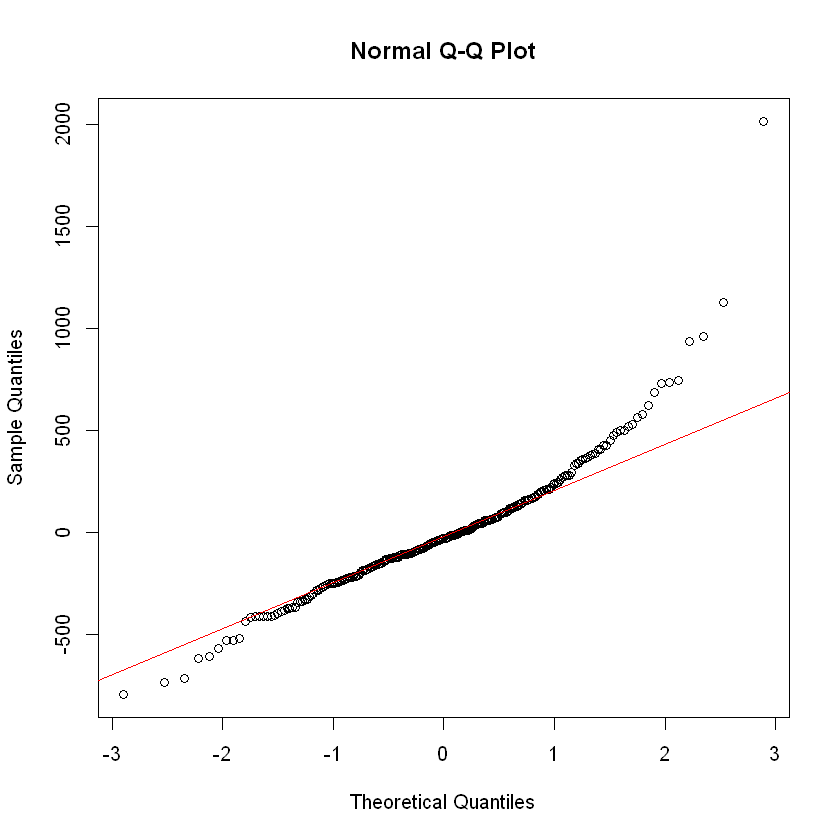

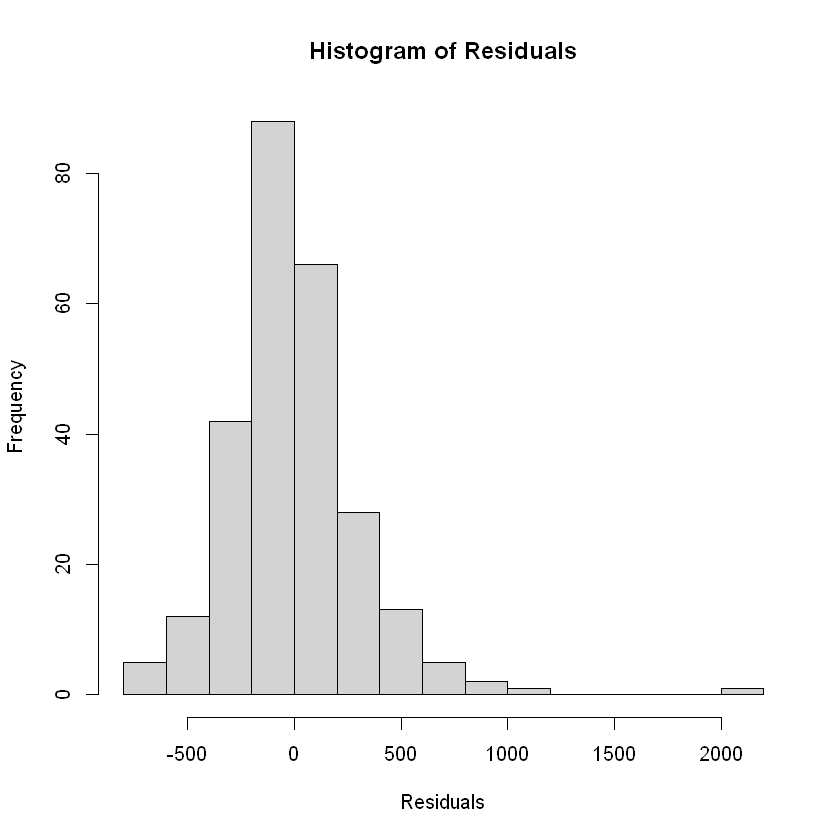

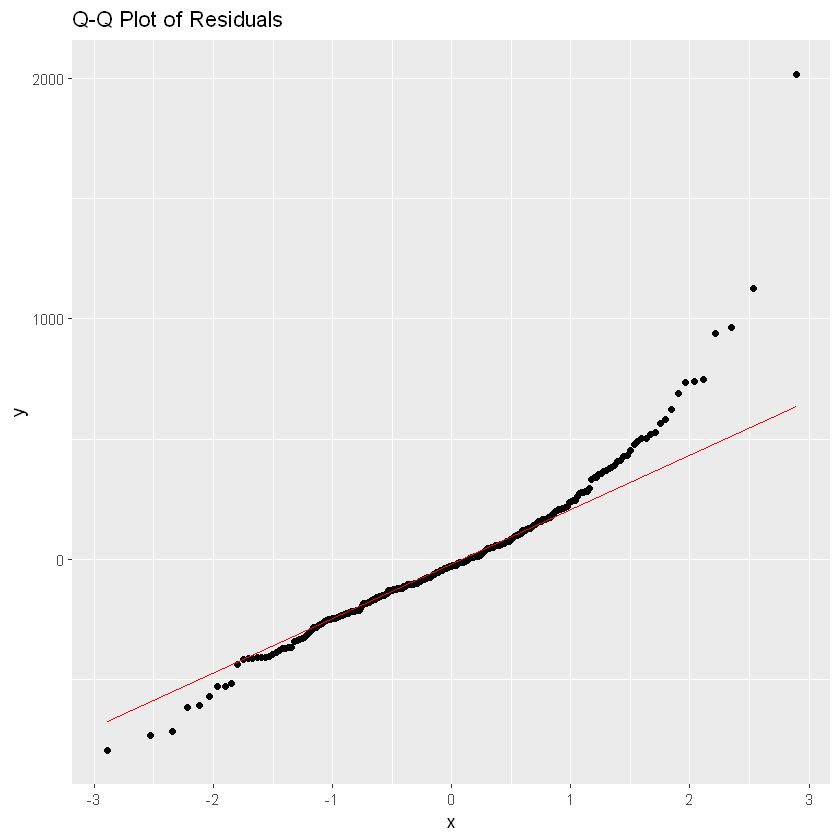

           Test stat Pr(>|Test stat|)    
AtBat         3.4243        0.0007190 ***
Hits          3.2455        0.0013305 ** 
Walks         3.6298        0.0003432 ***
CRuns        -3.9938        8.527e-05 ***
CRBI         -4.0563        6.646e-05 ***
CWalks       -4.4741        1.160e-05 ***
Division                                 
PutOuts      -0.8255        0.4098568    
Tukey test    3.2336        0.0012222 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


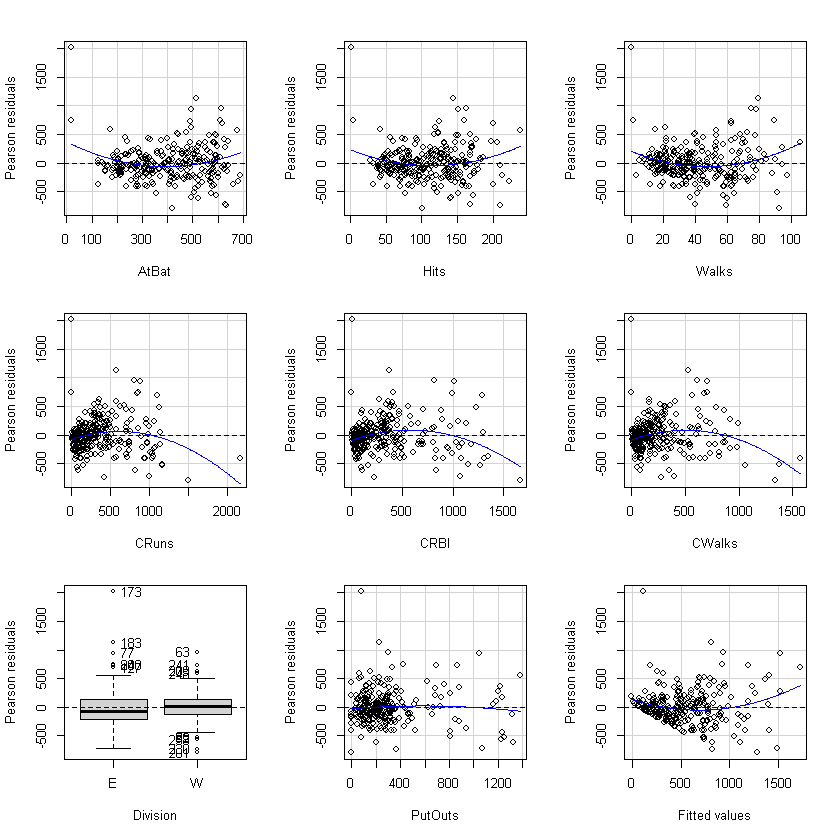

In [50]:
# 필요한 패키지 로드
library(car)  # for residualPlots
library(ggplot2)  # for q-q plot


# 최종 적합식 모델 생성
final_model = lm(Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts, data = Hitters)

# 잔차 추출
residuals = residuals(final_model)

# Q-Q 플롯 생성
qqnorm(residuals)
qqline(residuals, col = "red")

# Shapiro-Wilk 테스트
shapiro_test = shapiro.test(residuals)
print(shapiro_test)

# 추가적으로 잔차의 정규성을 위한 히스토그램
hist(residuals, breaks = 20, main = "Histogram of Residuals", xlab = "Residuals", ylab = "Frequency")

# 추가적으로 잔차의 정규성을 위한 Q-Q 플롯 (ggplot2 사용)
ggplot(data.frame(residuals), aes(sample = residuals)) +
  stat_qq() +
  stat_qq_line(col = "red") +
  ggtitle("Q-Q Plot of Residuals")

# 추가적으로 잔차 플롯 (car 패키지 사용)
residualPlots(final_model)


샤피로-윌크 테스트 결과와 잔차의 Q-Q 플롯 그래프를 보면 정규성을 충족하는 것으로 판단된다.


	studentized Breusch-Pagan test

data:  final_model
BP = 12.03, df = 8, p-value = 0.1499



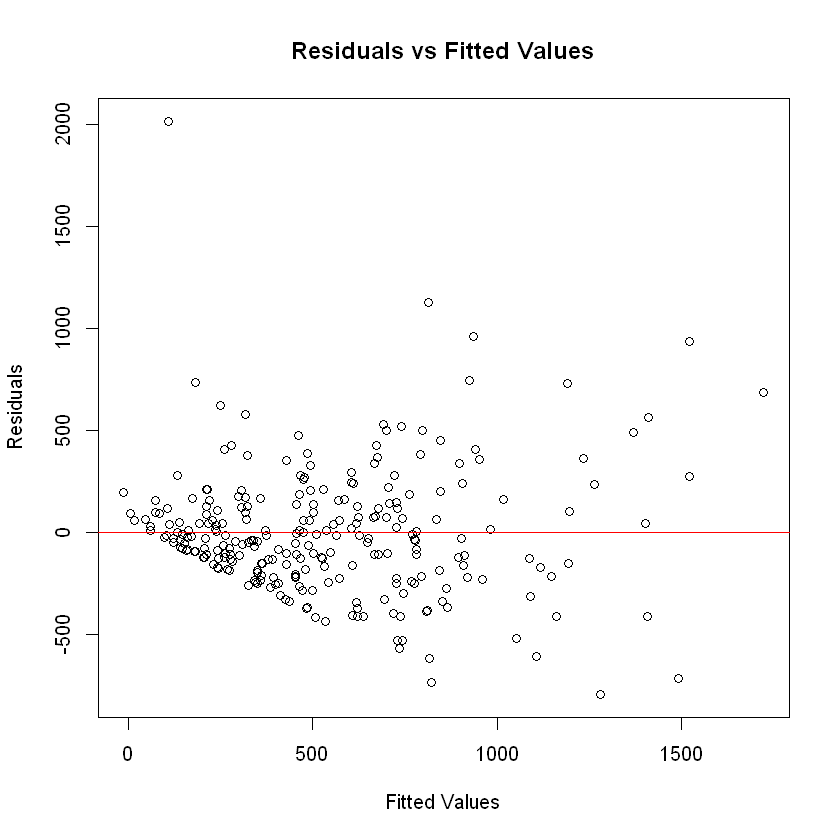

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 28.88059, Df = 1, p = 7.6981e-08


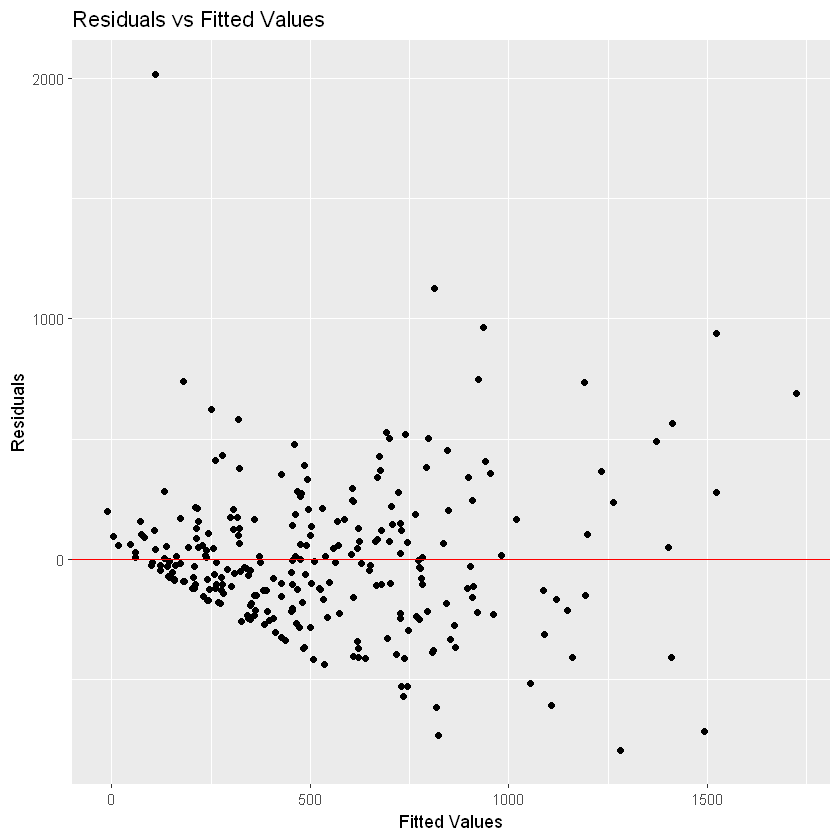

In [53]:
# 필요한 패키지 로드
library(lmtest)

# 최종 적합식 모델 생성
final_model = lm(Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts, data = Hitters)

# 잔차 추출
residuals = residuals(final_model)
fitted_values = fitted(final_model)

# 잔차 플롯 생성
plot(fitted_values, residuals,
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")

# Breusch-Pagan 테스트
bp_test = bptest(final_model)
print(bp_test)

# 추가적으로 ggplot2를 사용하여 잔차 플롯 생성
ggplot(data.frame(fitted_values, residuals), aes(x = fitted_values, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, col = "red") +
  xlab("Fitted Values") +
  ylab("Residuals") +
  ggtitle("Residuals vs Fitted Values")

# 추가적으로 car 패키지의 ncvTest (Non-constant Variance Test) 사용
ncv_test = ncvTest(final_model)
print(ncv_test)


잔차 플롯과 Breusch-Pagan 테스트, NCV 테스트 결과를 볼 때 오차의 등분산성이 충족되는 것으로 판단된다.

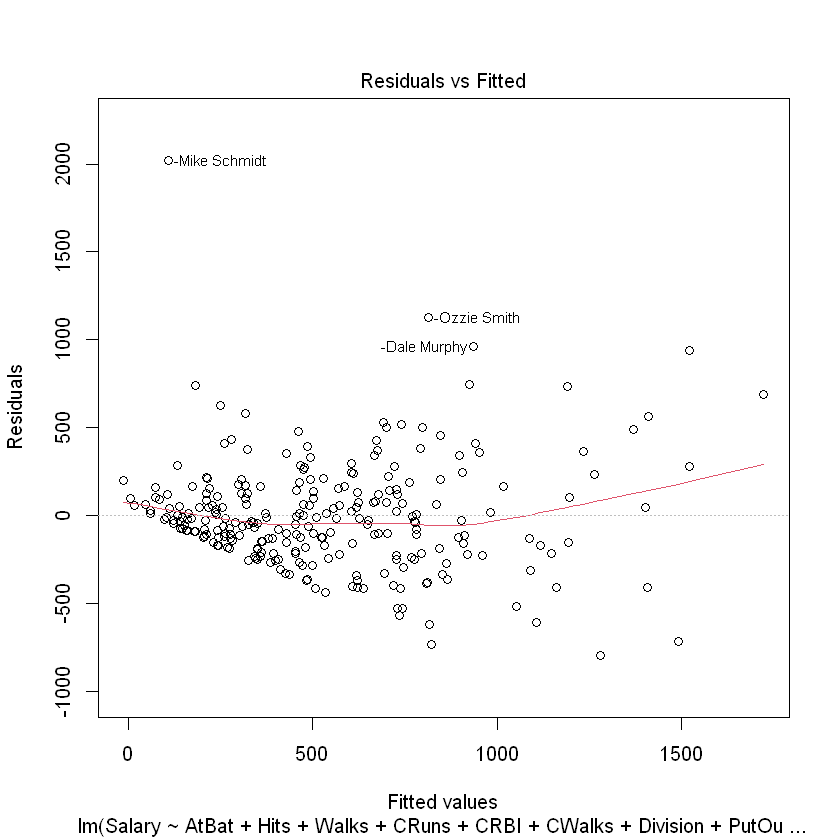

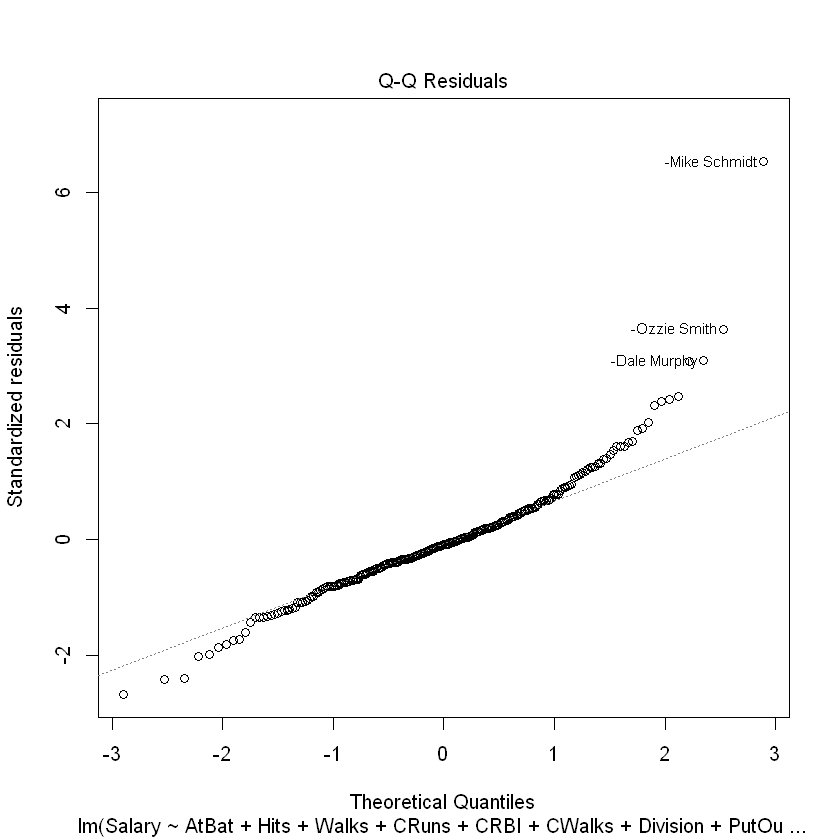

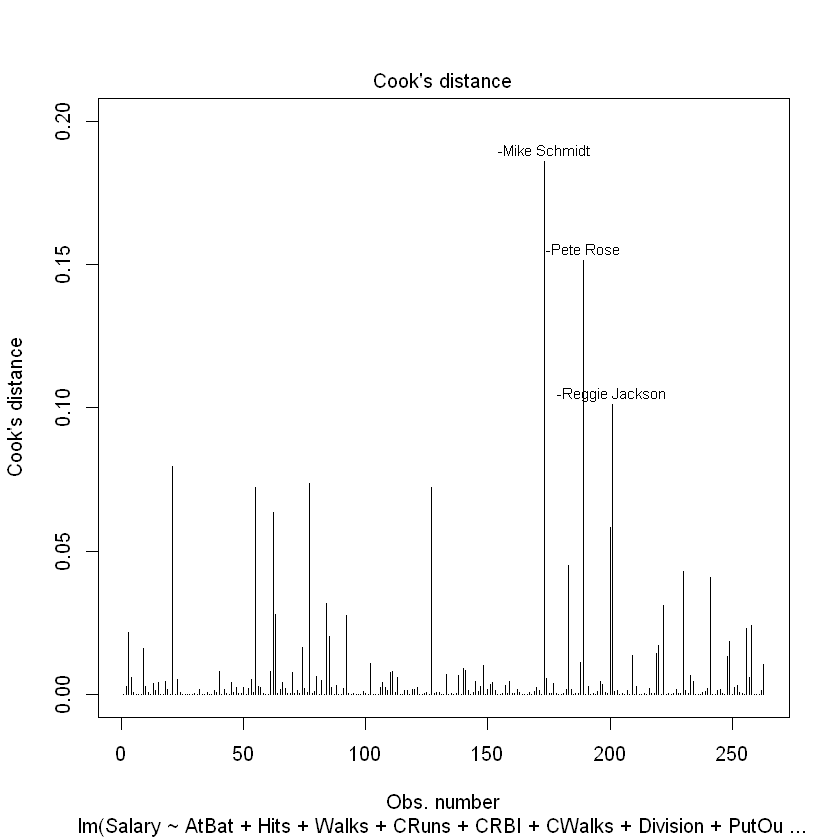

Influential Points (Cook's Distance > 4/n): 3 9 21 55 62 63 74 77 84 85 92 127 173 183 189 200 201 220 222 230 241 249 256 258 
Outliers (Standardized Residuals > 2): 21 63 77 84 127 173 183 200 201 209 222 230 241 


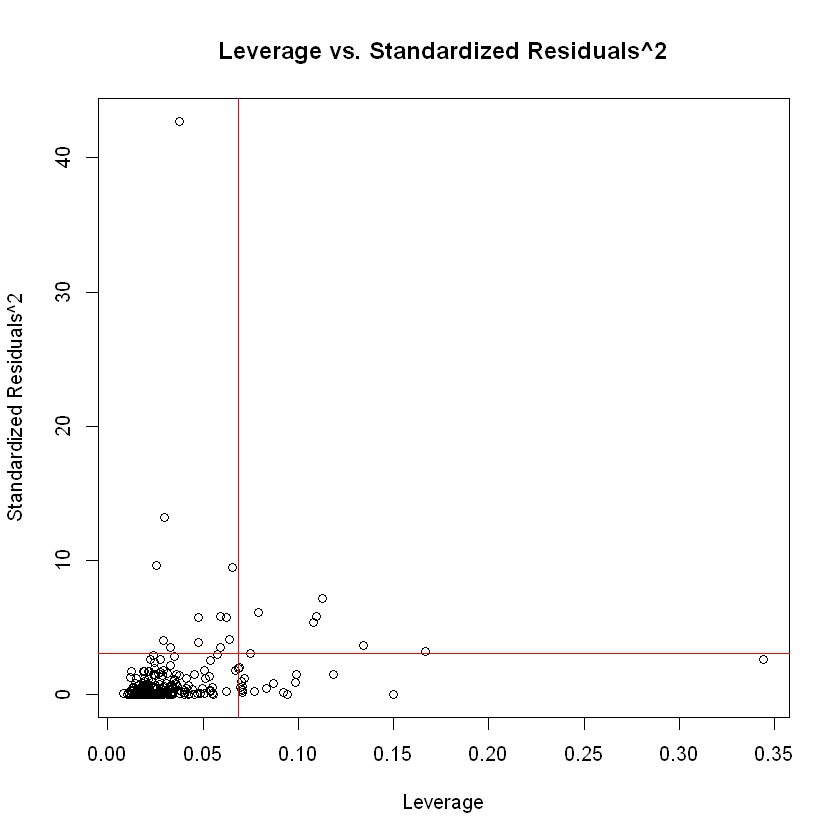

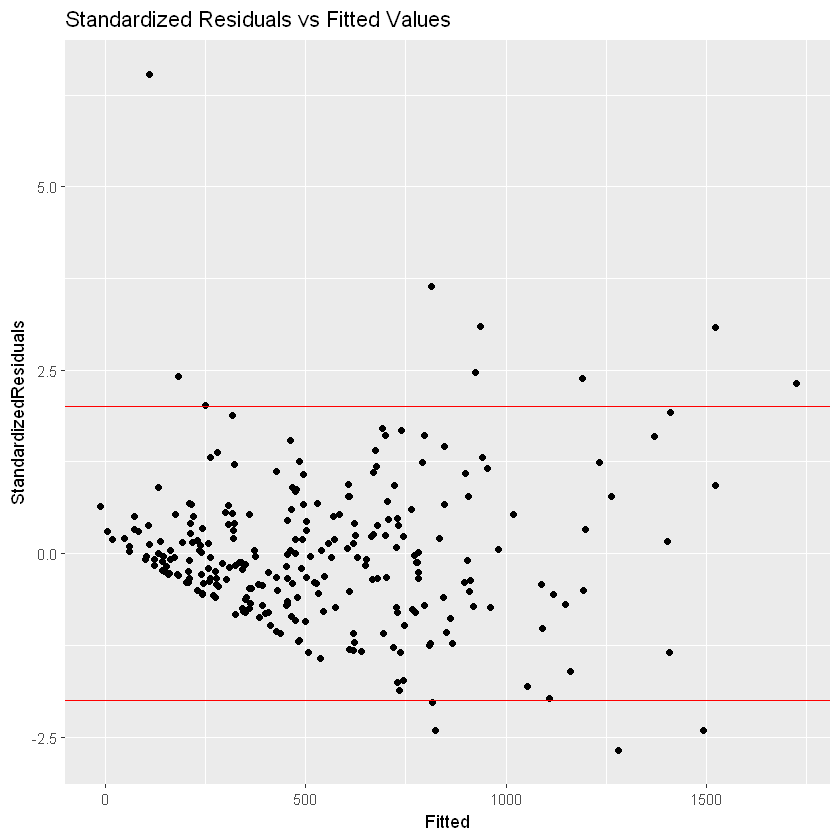

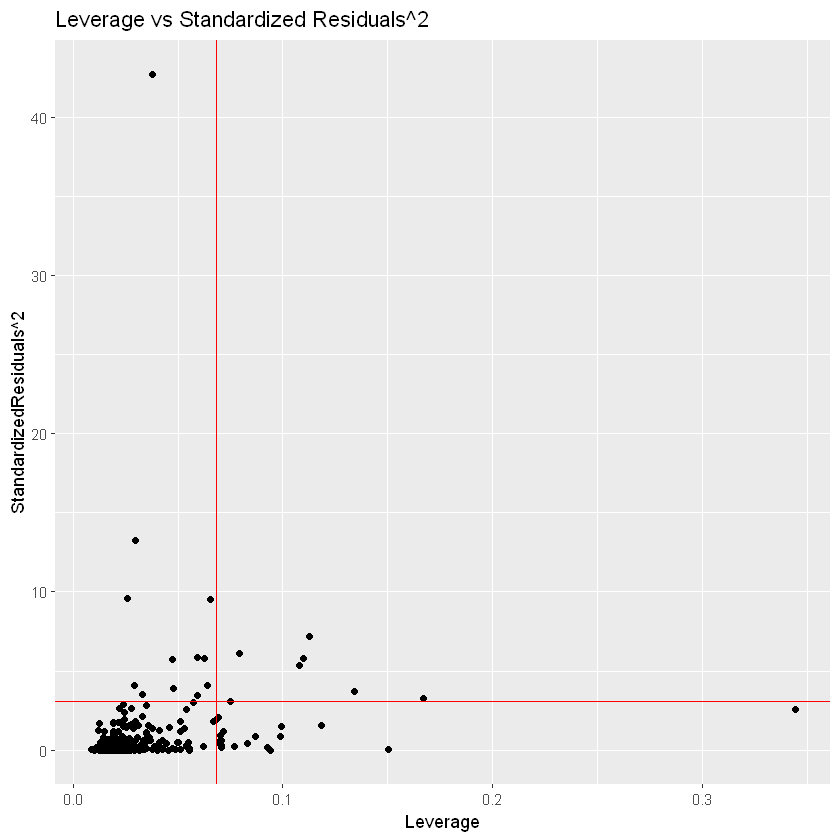

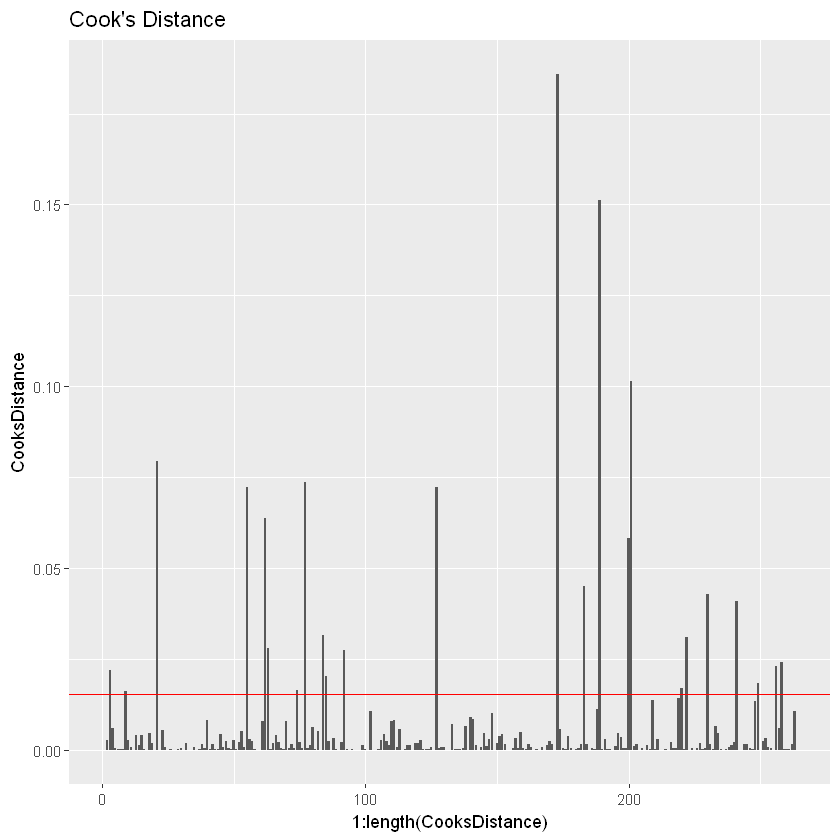

In [54]:
# 최종 적합식 모델 생성
final_model = lm(Salary ~ AtBat + Hits + Walks + CRuns + CRBI + CWalks + Division + PutOuts, data = Hitters)

# 잔차, 표준화 잔차, Cook's 거리, 레버리지 계산
residuals = residuals(final_model)
standardized_residuals = rstandard(final_model)
cooks_distance = cooks.distance(final_model)
leverage = hatvalues(final_model)

# 잔차 플롯 생성
plot(final_model, which = 1)

# 표준화 잔차 플롯 생성
plot(final_model, which = 2)

# Cook's 거리 플롯 생성
plot(final_model, which = 4)

# 레버리지 vs. 표준화 잔차 제곱
plot(leverage, standardized_residuals^2,
     xlab = "Leverage",
     ylab = "Standardized Residuals^2",
     main = "Leverage vs. Standardized Residuals^2")
abline(h = 3 * mean(standardized_residuals^2), col = "red")
abline(v = 2 * mean(leverage), col = "red")

# 영향점 및 이상점 식별
influential_points = which(cooks_distance > 4 / length(cooks_distance))
outliers = which(abs(standardized_residuals) > 2)

# 결과 출력
cat("Influential Points (Cook's Distance > 4/n):", influential_points, "\n")
cat("Outliers (Standardized Residuals > 2):", outliers, "\n")

# 추가적인 시각화를 위한 ggplot2 사용
data_frame = data.frame(Fitted = fitted(final_model), StandardizedResiduals = standardized_residuals, Leverage = leverage, CooksDistance = cooks_distance)

ggplot(data_frame, aes(x = Fitted, y = StandardizedResiduals)) +
  geom_point() +
  geom_hline(yintercept = c(-2, 2), col = "red") +
  ggtitle("Standardized Residuals vs Fitted Values")

ggplot(data_frame, aes(x = Leverage, y = StandardizedResiduals^2)) +
  geom_point() +
  geom_hline(yintercept = 3 * mean(standardized_residuals^2), col = "red") +
  geom_vline(xintercept = 2 * mean(leverage), col = "red") +
  ggtitle("Leverage vs Standardized Residuals^2")

ggplot(data_frame, aes(x = 1:length(CooksDistance), y = CooksDistance)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 4 / length(cooks_distance), col = "red") +
  ggtitle("Cook's Distance")


3.
  - AtBat
  - Hits
  - Walks
  - CAtBat
  - CRuns
  - CRBi
  - CWalks
  - League
  - Division
  - PutOuts
  - Assists  
를 설명변수로 하는 다중회귀를 적합시킨다고 할 때, 이 모형에 대한 2번 문제의 물음에 답해보아라.

In [25]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
